## Frequent patterns and association rules

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [89]:
from utils import load_data
data = load_data('./Data/Dataset3.csv')

In [90]:
data.iloc[0,0] 
data.head(10)

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,"24,87","82,84","295,61",Clayey,rice,DAP
1,"28,69","96,65","178,96",laterite,Coconut,Good NPK
2,"20,27","81,64","270,44",silty clay,rice,MOP
3,"25,07","95,02","192,9",sandy,Coconut,Urea
4,"25,04","95,9","174,8",coastal,Coconut,Urea
5,"20,82","84,13","230,22",clay loam,rice,Urea
6,"25,95","93,41","172,05",alluvial,Coconut,Urea
7,"26,49","80,16","242,86",Clayey,rice,DAP
8,"25,01","95,59","165,81",coastal,Coconut,Urea
9,"21,87","80,19","224,56",silty clay,rice,Urea


In [91]:
from utils import describe_column
colonnes_description = describe_column(data)
pd.DataFrame(colonnes_description, columns = ["Name","Non-null value","Type"])

,Name,Non-null value,Type
0,Temperature,295,object
1,Humidity,295,object
2,Rainfall,295,object
3,Soil,295,object
4,Crop,295,object
5,Fertilizer,295,object


<h1>2.1. Discrétisation des données 

<h2>a- Classes d’effectifs égaux (equal frequency)

In [92]:
from utils import equal_width_discretization
column_name = "Rainfall"
df_after = equal_width_discretization(data, column_name, 1)
df_after

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer,Discretized
0,"24,87","82,84",295.61,Clayey,rice,DAP,9
1,"28,69","96,65",178.96,laterite,Coconut,Good NPK,3
2,"20,27","81,64",270.44,silty clay,rice,MOP,8
3,"25,07","95,02",192.90,sandy,Coconut,Urea,4
4,"25,04","95,9",174.80,coastal,Coconut,Urea,3
...,...,...,...,...,...,...,...
290,"26,07","96,7",143.53,sandy,Coconut,MOP,1
291,"25,63","83,53",209.90,silty clay,rice,MOP,5
292,"24,52","83,54",230.45,Clayey,rice,MOP,6
293,"25,66","83,47",217.38,Clayey,rice,MOP,5


In [93]:
from utils import equal_frequency_discretization
df_after2 = equal_frequency_discretization(data, column_name, 1)
df_after2

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer,Discretized
0,"24,87","82,84",295.61,Clayey,rice,DAP,9
1,"28,69","96,65",178.96,laterite,Coconut,Good NPK,3
2,"20,27","81,64",270.44,silty clay,rice,MOP,9
3,"25,07","95,02",192.90,sandy,Coconut,Urea,4
4,"25,04","95,9",174.80,coastal,Coconut,Urea,3
...,...,...,...,...,...,...,...
290,"26,07","96,7",143.53,sandy,Coconut,MOP,1
291,"25,63","83,53",209.90,silty clay,rice,MOP,6
292,"24,52","83,54",230.45,Clayey,rice,MOP,7
293,"25,66","83,47",217.38,Clayey,rice,MOP,6


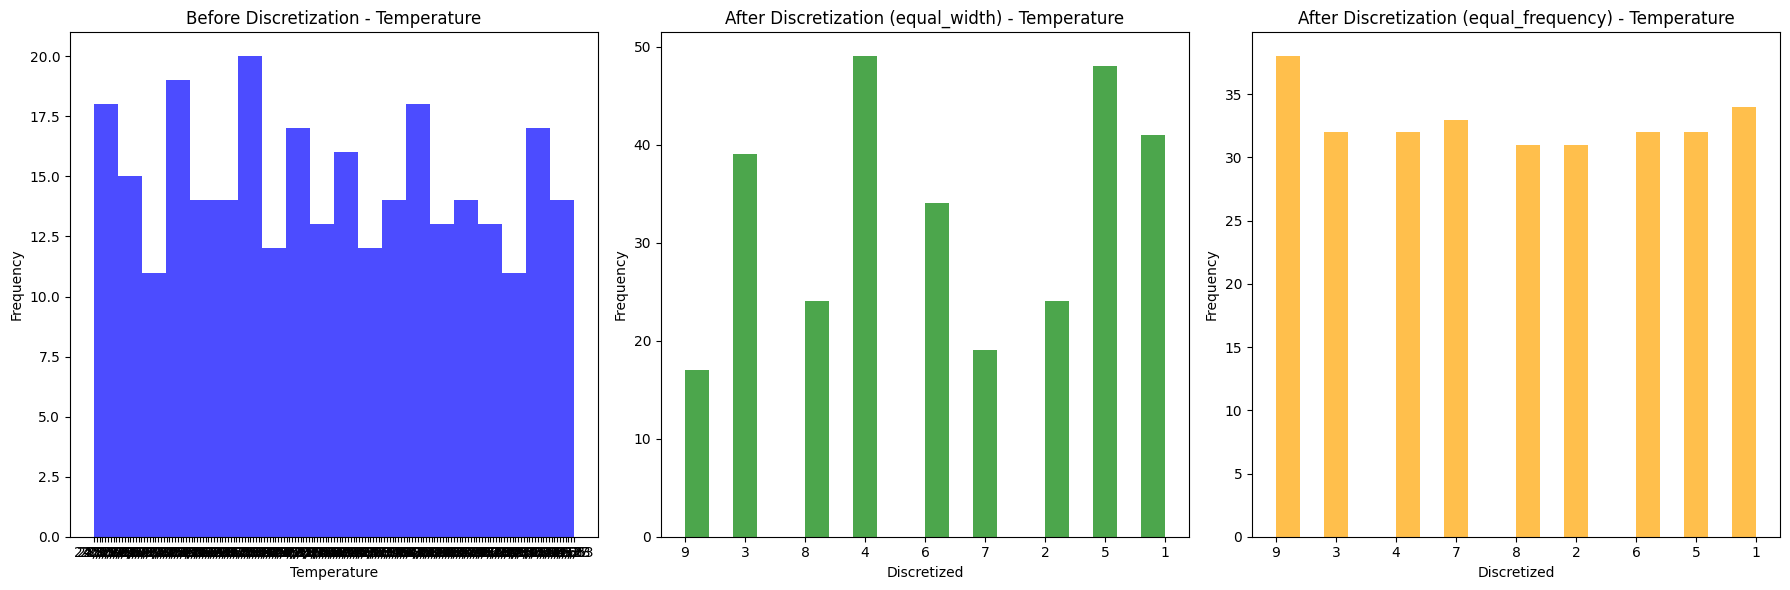

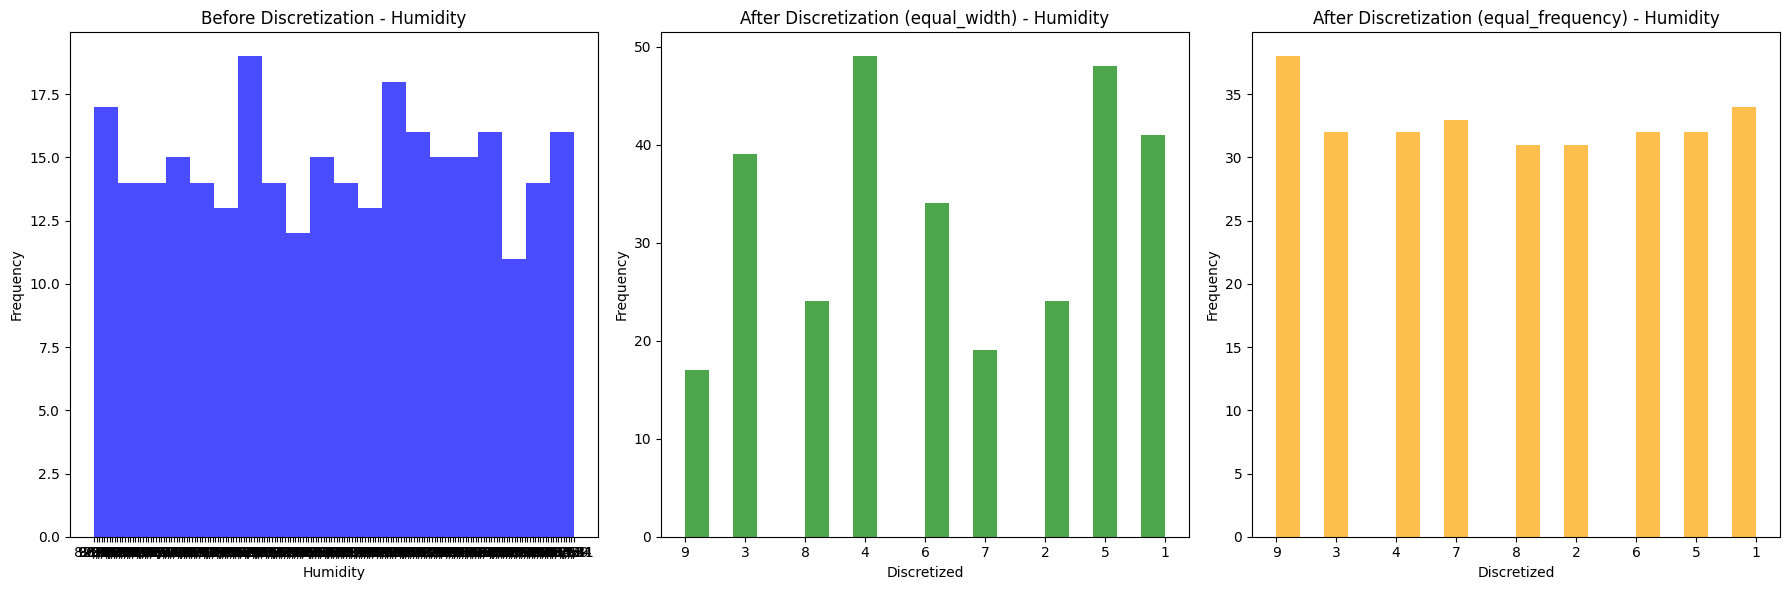

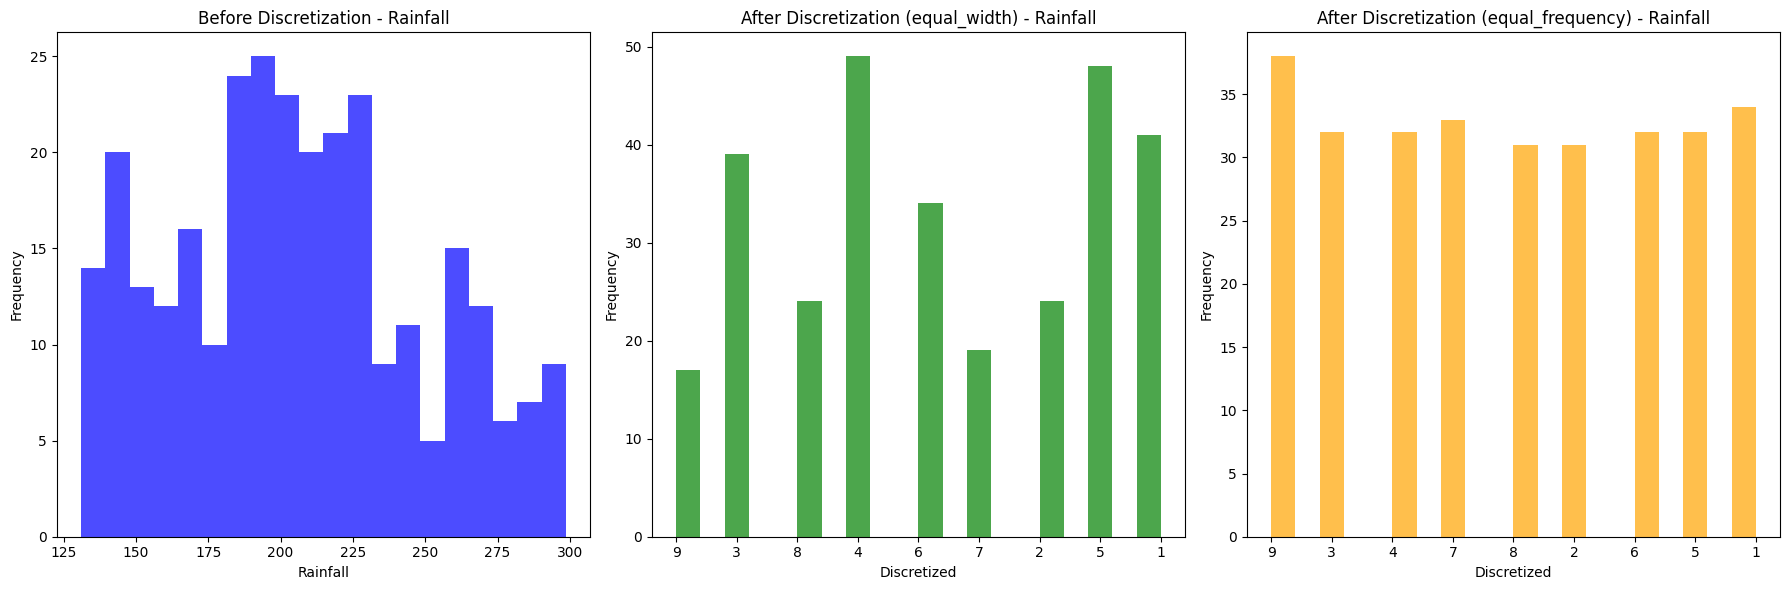

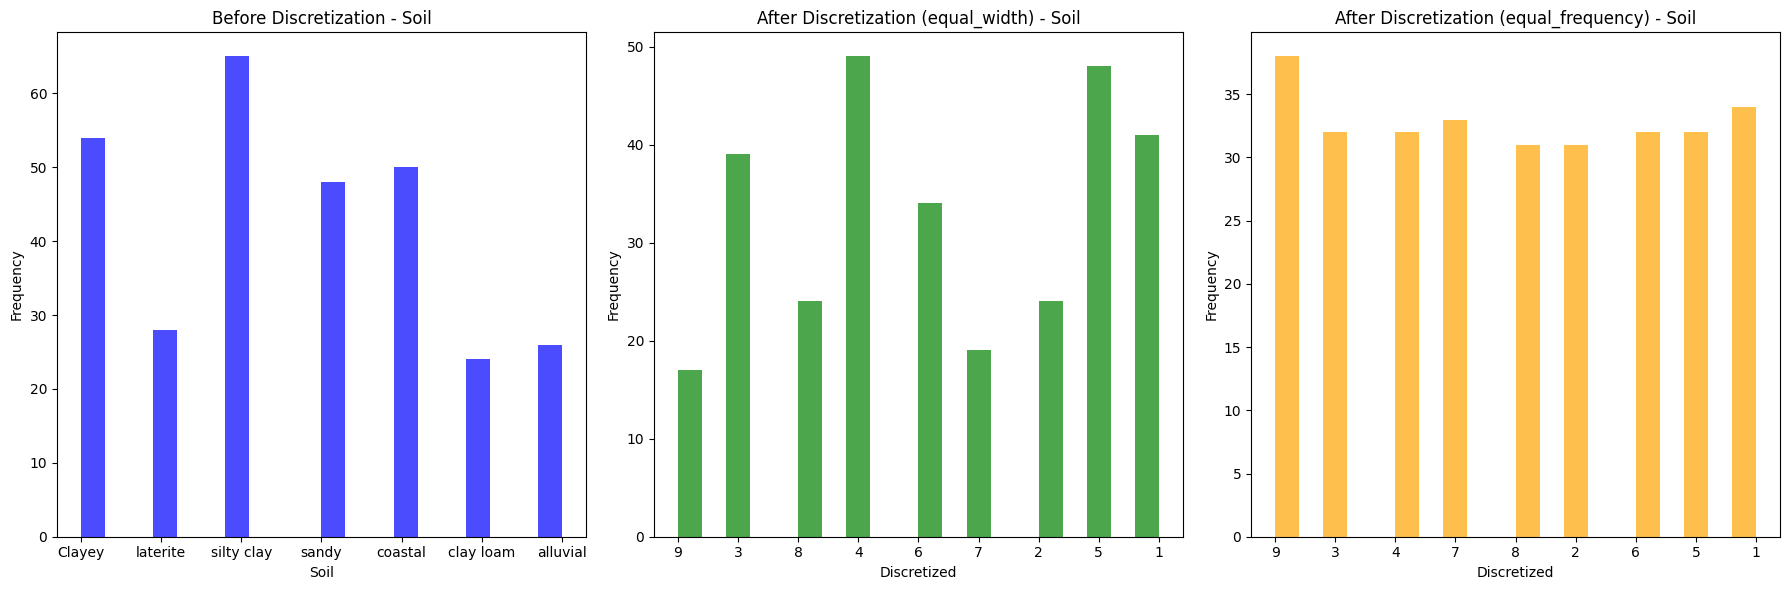

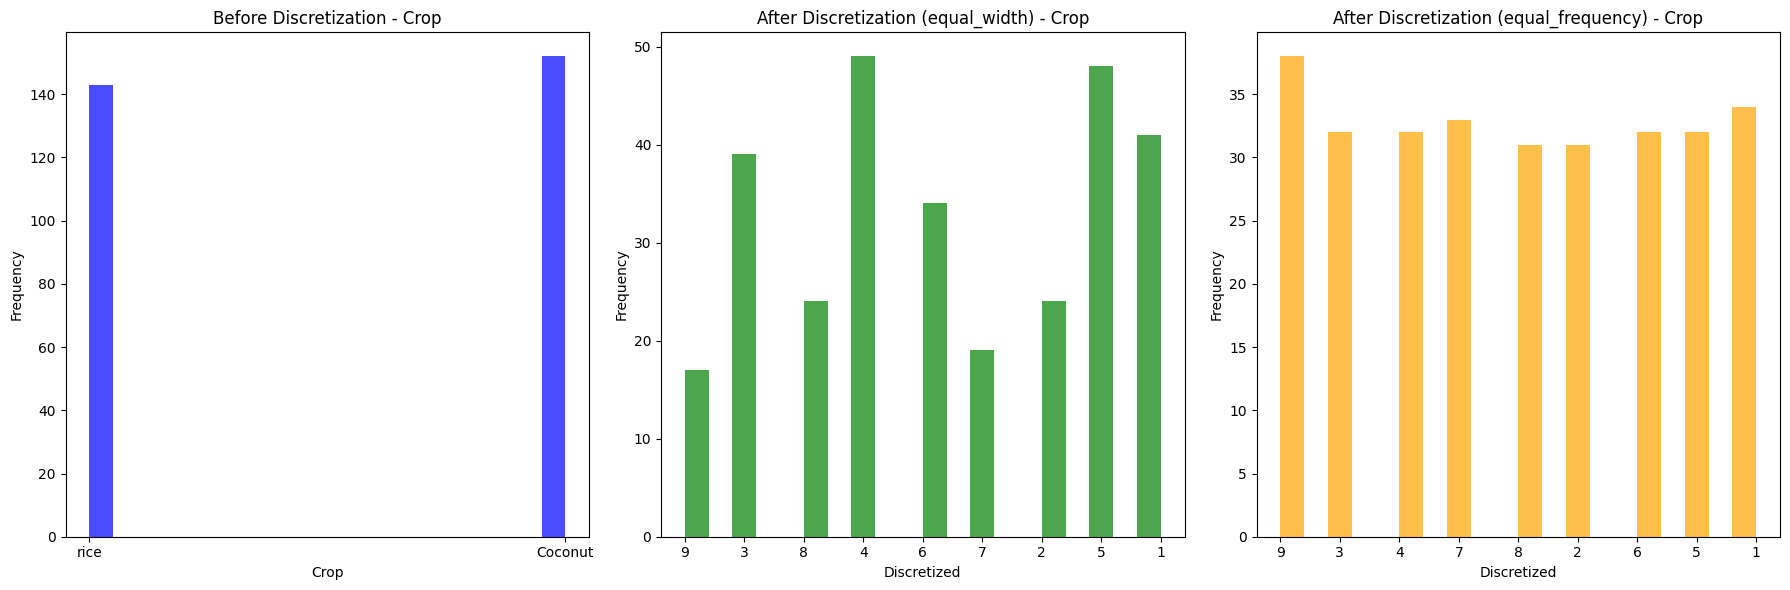

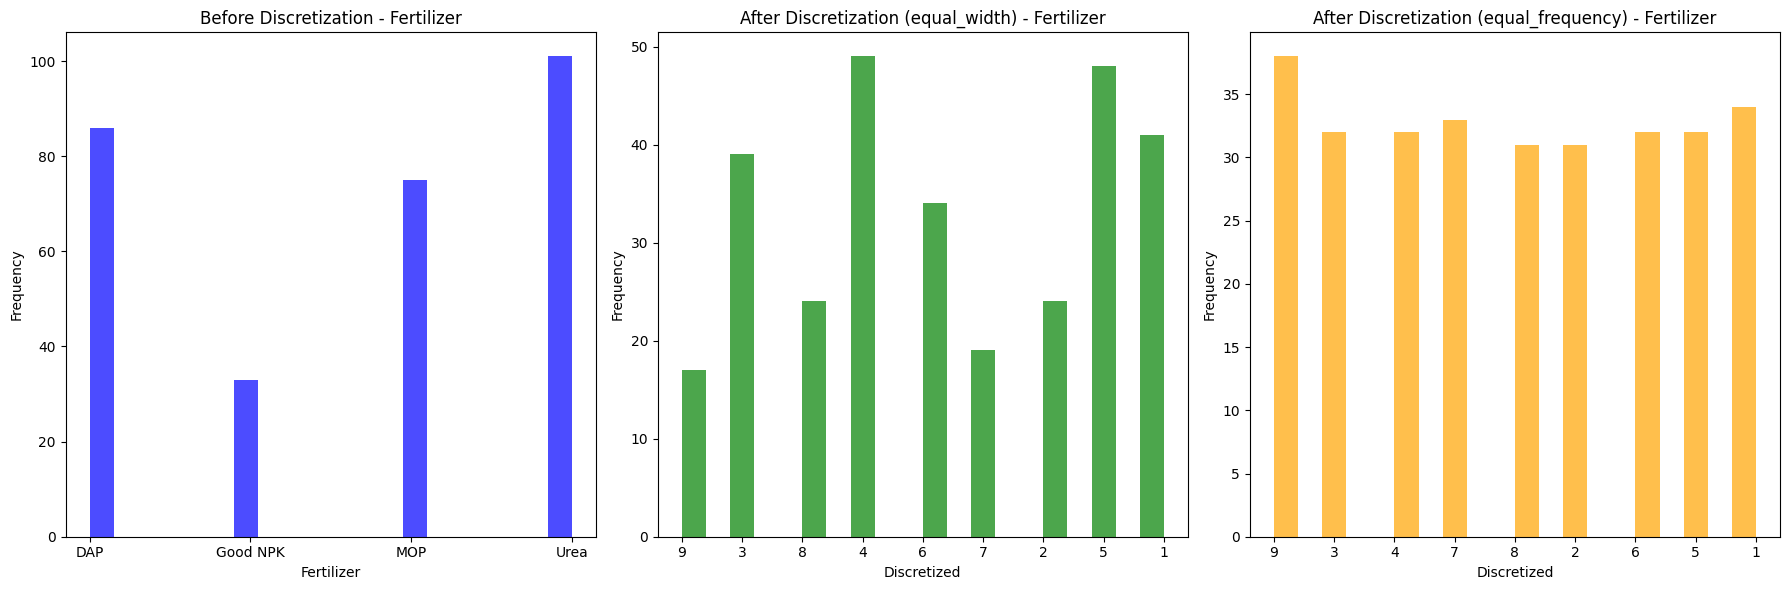

In [94]:
from utils import plot_before_after_discretization
attributes = data.columns

for attribute in attributes:
    plot_before_after_discretization(data, attribute, df_after, df_after2)
    

<h1>2.2. Extraction des motifs fréquents et règles d’association 

<h2>Motifs fréquents

In [95]:

df = equal_frequency_discretization(data, column_name, 2)
grouped = df_after2.groupby('Soil').agg({
    'Discretized': set,
    #'Humidity': set,
    #'Crop': set,
    #'Fertilizer': set
   
   
}).reset_index()
grouped.to_csv('./Data/Dataset3_bis.csv', index=False)

In [96]:
grouped

,Soil,Discretized
0,Clayey,"{3, 9, 8, 6, 4, 7, 5}"
1,alluvial,"{3, 1, 5, 6, 4, 7, 2}"
2,clay loam,"{3, 9, 8, 6, 4, 7, 5}"
3,coastal,"{3, 1, 5, 6, 4, 7, 2}"
4,laterite,"{3, 1, 5, 6, 4, 7, 2}"
5,sandy,"{3, 1, 5, 6, 4, 7, 2}"
6,silty clay,"{3, 9, 8, 6, 4, 7, 5}"


In [97]:
dataset = df_after.groupby('Soil').agg({
    'Discretized': set,
    'Fertilizer': set
}).reset_index()
dataset.to_csv('./Data/Dataset-bis_bis.csv', index=False)
dataset

,Soil,Discretized,Fertilizer
0,Clayey,"{3, 9, 8, 6, 4, 7, 5}","{Urea, DAP, MOP, Good NPK}"
1,alluvial,"{3, 1, 5, 6, 4, 2}","{DAP, Urea, MOP}"
2,clay loam,"{3, 9, 8, 6, 4, 7, 5}","{DAP, Urea, MOP, Good NPK}"
3,coastal,"{3, 1, 5, 6, 4, 2}","{DAP, Urea, Good NPK, MOP}"
4,laterite,"{3, 1, 5, 6, 4, 2}","{DAP, Urea, Good NPK, MOP}"
5,sandy,"{3, 1, 5, 6, 4, 2}","{DAP, Urea, Good NPK, MOP}"
6,silty clay,"{3, 9, 8, 6, 4, 7, 5}","{DAP, Urea, MOP, Good NPK}"


<h3>Apriori

In [98]:
from itertools import combinations

def generate_candidates(itemsets, k):
    candidates = set()
    for itemset1 in itemsets:
        for itemset2 in itemsets:
            union_set = itemset1.union(itemset2)
            if len(union_set) == k:
                candidates.add(union_set)
    return candidates

def prune_candidates(candidates, prev_frequent_sets):
    pruned_candidates = set()
    for candidate in candidates:
        subsets = list(combinations(candidate, len(candidate) - 1))
        if all(subset in prev_frequent_sets for subset in subsets):
            pruned_candidates.add(candidate)
    return pruned_candidates

def apriori(dataset, min_support):
    itemsets = [set(value) for value in dataset["Discretized"]]
    
    frequent_sets = []
    k = 1

    while len(itemsets) > 0:
        candidates = generate_candidates(itemsets, k)
        counts = {candidate: 0 for candidate in candidates}

        for transaction in itemsets:
            for candidate in candidates:
                if candidate.issubset(transaction):
                    counts[candidate] += 1

        frequent_sets_k = [itemset for itemset, count in counts.items() if count >= min_support]
        frequent_sets.extend(frequent_sets_k)

        itemsets = prune_candidates(candidates, frequent_sets_k)
        k += 1

    return frequent_sets



In [99]:
#dataset = np.array(dataset)

In [100]:
# Assuming your dataset is a DataFrame
dataset = pd.DataFrame({
    "Soil": ["Clayey", "alluvial", "clay loam", "coastal", "laterite", "sandy", "silty clay"],
    "Discretized": [
        "{'3', '9', '8', '6', '4', '7', '5'}",
        "{'3', '1', '5', '6', '4', '2'}",
        "{'3', '9', '8', '6', '4', '7', '5'}",
        "{'3', '1', '5', '6', '4', '2'}",
        "{'3', '1', '5', '6', '4', '2'}",
        "{'3', '1', '5', '6', '4', '2'}",
        "{'3', '9', '8', '6', '4', '7', '5'}"
    ]
})

min_support = 3
frequent_sets = apriori(dataset, min_support)

print("Frequent Itemsets:")
for itemset in frequent_sets:
    print(itemset)


Frequent Itemsets:


In [101]:
transactional_data = dataset

In [102]:
from itertools import chain, combinations

def generate_candidates(prev_candidates, k):
    """Generates k-itemsets candidates from frequent (k-1)-itemsets."""
    candidates = set()

    for itemset1 in prev_candidates:
        for itemset2 in prev_candidates:
            union_set = itemset1.union(itemset2)
            if len(union_set) == k:
                candidates.add(union_set)

    return list(candidates)

def calculate_support(transactions, candidates):
    """Calculates the support of k-itemsets candidates."""
    support_count = {}

    for transaction in transactions:
        for candidate in candidates:
            if candidate.issubset(transaction):
                support_count[candidate] = support_count.get(candidate, 0) + 1

    return support_count

def generate_frequent_itemsets(candidates, min_support, transactions):
    """Generates frequent k-itemsets from k-itemsets candidates."""
    frequent_itemsets = []
    support_count = calculate_support(transactions, candidates)

    for itemset, support in support_count.items():
        if support >= min_support:
            frequent_itemsets.append((itemset, support))

    return frequent_itemsets

def apriori(transactions, min_support, max_k):
    """Apriori algorithm implementation."""
    items = [frozenset(i) for i in transactions]
    frequent_itemsets_dict = {}

    for k in range(1, max_k + 1):
        candidates = generate_candidates(items, k)
        
        if not candidates:
            print("No itemsets generated for k =", k)
            break

        frequent_itemsets = generate_frequent_itemsets(candidates, min_support, items)
        frequent_itemsets_dict[k] = frequent_itemsets

    return frequent_itemsets_dict

# Example usage
min_support = 2
max_k = 20  # You can set this to an appropriate maximum value
frequent_itemsets_result = apriori(transactional_data['Discretized'], min_support, max_k)

# Print the result
for k, frequent_itemsets in frequent_itemsets_result.items():
    print("Frequent L{}:".format(k))
    for itemset, support in frequent_itemsets:
        print("{}: {}".format(itemset, support))


No itemsets generated for k = 1


<h3> un autre algo

In [103]:
#  Crée les candidats initiaux, qui sont les éléments individuels, à partir des données de transaction.
def create_initial_candidates(data):
    candidates = set()
    for transaction in data:
        for item in transaction:
            candidates.add(frozenset([item])) 
    return list(candidates)
# Calcule le support d'un itemset en parcourant les transactions et en comptant le nombre de fois où l'itemset apparaît dans chaque transaction.
def calculate_support(data, itemset):
    count = 0
    for transaction in data:
        if itemset.issubset(transaction):
            count += 1
    return count
# Élaguer les candidats qui ne répondent pas au support minimum.
def prune_candidates(candidates, prev_frequent_items, k):
    pruned_candidates = []
    for candidate in candidates:
        support = calculate_support(data, candidate)
        if support >= k:
            pruned_candidates.append(candidate)
    return pruned_candidates
# Génère de nouveaux candidats en combinant les candidats fréquents de la dernière étape.
def generate_candidates(prev_candidates, k):
    candidates = set()
    n = len(prev_candidates)
    for i in range(n):
        for j in range(i + 1, n):
            itemset1 = list(prev_candidates[i])
            itemset2 = list(prev_candidates[j])
            if itemset1[:-1] == itemset2[:-1]:
                new_candidate = frozenset(itemset1 + [itemset2[-1]])
                candidates.add(new_candidate)
    return list(candidates)
# L'algorithme Apriori.
def apriori(data, min_support):
    candidates = create_initial_candidates(data)
    k = 1
    frequent_itemsets = []
    while candidates:
        if frequent_itemsets:
            candidates = prune_candidates(candidates, frequent_itemsets[-1], min_support)
        frequent_itemsets.extend(candidates)
        k += 1
        candidates = generate_candidates(candidates, k)
    
    return frequent_itemsets
data = []

for index, row in grouped.iterrows():
    video_categories = row['Discretized']
    data.append(set(video_categories))
min_support = 5
frequent_itemsets = apriori(data, min_support)
print("Ensembles fréquents:")
for itemset in frequent_itemsets:
    print(f"{list(itemset)} - Support: {calculate_support(data, itemset)}")

Ensembles fréquents:
['1'] - Support: 4
['6'] - Support: 7
['2'] - Support: 4
['3'] - Support: 7
['5'] - Support: 7
['7'] - Support: 7
['8'] - Support: 3
['4'] - Support: 7
['9'] - Support: 3
['6', '4'] - Support: 7
['7', '6'] - Support: 7
['7', '4'] - Support: 7
['3', '5'] - Support: 7
['3', '4'] - Support: 7
['3', '6'] - Support: 7
['5', '6'] - Support: 7
['5', '4'] - Support: 7
['7', '5'] - Support: 7
['7', '3'] - Support: 7
['3', '6', '5'] - Support: 7
['3', '7', '5'] - Support: 7
['7', '6', '4'] - Support: 7
['3', '6', '4'] - Support: 7
['5', '6', '4'] - Support: 7
['7', '5', '6'] - Support: 7
['7', '3', '6'] - Support: 7
['3', '4', '5'] - Support: 7
['7', '5', '4'] - Support: 7
['7', '3', '4'] - Support: 7
['3', '4', '6', '5'] - Support: 7
['7', '3', '6', '4'] - Support: 7
['7', '5', '6', '4'] - Support: 7
